## Training data-efficient image transformers & distillation through attention

Vision Transformers (ViT) are data hungry, to work well they were trained on a private dataset with 300 Images (JFT-300M) then finetuned for a different doenstream task.

Data Efficient Image Transformers solves this problem by using **Knowledge Distillation** from another architecture (teacher) to a Transformer based Architecture (student) while using only one dataset (Imagenet)

From the paper; page 2:

In summary, our work makes the following contributions:
* We show that our neural networks that contains no convolutional layer
can achieve competitive results against the state of the art on ImageNet
with no external data. They are learned on a single node with 4 GPUs in
three days. Our two new models DeiT-S and DeiT-Ti have fewer parameters
and can be seen as the counterpart of ResNet-50 and ResNet-18.
* We introduce a new distillation procedure based on a distillation token,
which plays the same role as the class token, except that it aims at reproducing
the label estimated by the teacher. Both tokens interact in the
transformer through attention. This transformer-specific strategy outperforms
vanilla distillation by a significant margin.
* Interestingly, with our distillation, image transformers learn more from a
convnet than from another transformer with comparable performance.
* Our models pre-learned on Imagenet are competitive when transferred to
different downstream tasks such as fine-grained classification, on several
popular public benchmarks: CIFAR-10, CIFAR-100, Oxford-102 flowers,
Stanford Cars and iNaturalist-18/19.

### Knowledge Distillation

Knowledge Distillation (KD), introduced by Hinton et al. [24], refers to the
training paradigm in which a student model leverages “soft” labels coming
from a strong teacher network. This is the output vector of the teacher’s softmax
function rather than just the maximum of scores, wich gives a “hard” label.
Such a training improves the performance of the student model

In [24]:
import torch
import torchvision
from torch import nn
import torchvision.transforms.v2 as T
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder


import os
import random
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
train_data_path = Path(r"C:\Users\bamilosin\Documents\dataset\vision\food vision data\pizza_steak_sushi-20%\train")
test_data_path = Path(r"C:\Users\bamilosin\Documents\dataset\vision\food vision data\pizza_steak_sushi-20%\test")

transforms = T.Compose([
    T.ToImage(),
    T.Resize((224,224)),
    T.ToDtype(torch.float, scale=True)
])

train_dataset = ImageFolder(train_data_path, transform=transforms)
test_dataset = ImageFolder(test_data_path, transform=transforms)

BATCH_SIZE = 64
train_dataloader = DataLoader(train_dataset, BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, BATCH_SIZE)

In [32]:
images, labels = next(iter(train_dataloader))
idx_to_class = {idx: label for label, idx in train_dataset.class_to_idx.items()}

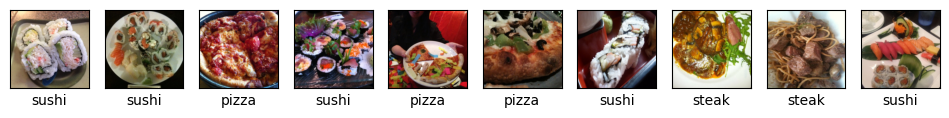

In [40]:
# plot random samples
samples = random.sample(k=10, population=range(0, len(images)))
fig, axs = plt.subplots(nrows=1, ncols=len(samples), figsize=(12,10))
for i, sample in enumerate(samples):
    axs[i].imshow(images[sample].permute(1,2,0))
    axs[i].set(xticks=[], yticks=[])
    axs[i].set_xlabel(f"{idx_to_class[labels[sample].item()]}")


### visualize patches

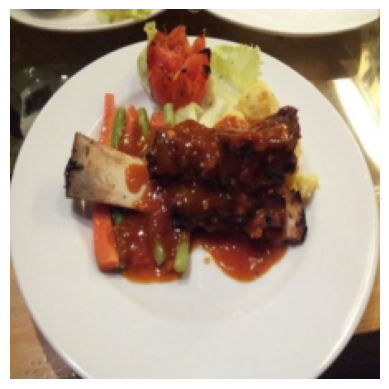

In [42]:
image = images[0].permute(1,2,0)
plt.imshow(image)
plt.axis('off')
plt.show()

Number of patches: 196


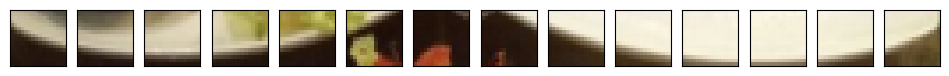

In [ ]:
image_height = 224 # height
image_width = 224 # width
patch_size = 16 # patch size


fig, axs = plt.subplots(nrows=1, ncols=image_height//patch_size, figsize=(12,10))
for i,patch in enumerate(range(0, image_height, patch_size)):
    axs[i].imshow(image[:patch_size, patch:patch+patch_size, :])
    axs[i].set(xticks=[], yticks=[])
plt.show()

Number of patches: 196


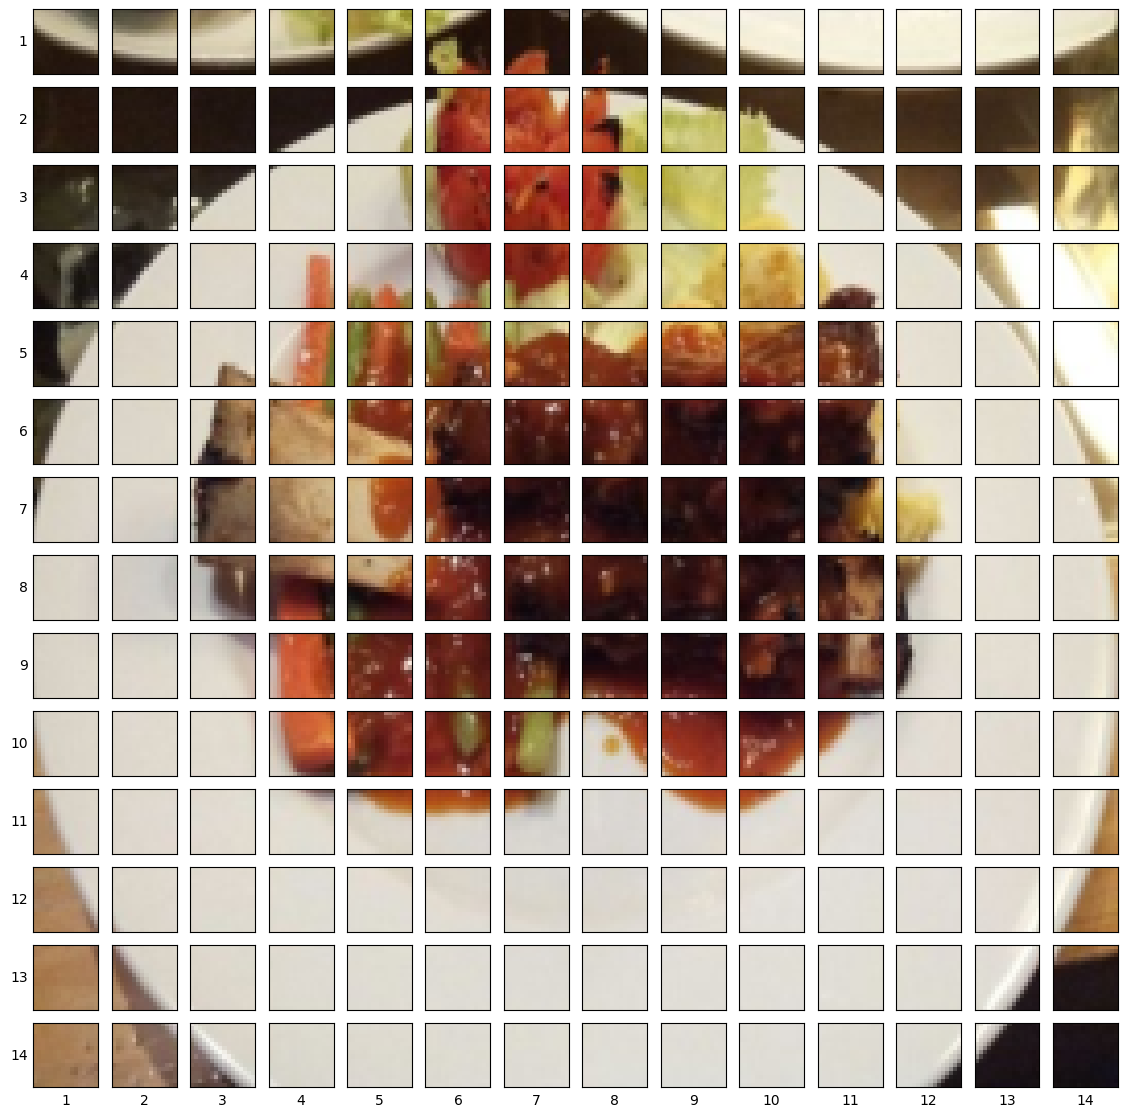

In [64]:
number_of_patches = (image_height * image_width) // patch_size**2
assert image_height % patch_size == 0, f"({image_height},{image_width} is not divisible by {patch_size})"
print(f"Number of patches: {number_of_patches}")

patch_per_row = image_height // patch_size

fig, axs = plt.subplots(nrows=patch_per_row, ncols=patch_per_row, figsize=(patch_per_row, patch_per_row))

for i, patch_x in enumerate(range(0, image_height, patch_size)):
    for j, patch_y in enumerate(range(0, image_width, patch_size)):
        axs[i,j].imshow(image[patch_x:patch_size+patch_x, patch_y:patch_y+patch_size])
        axs[i,j].set(xticks=[], yticks=[])
        axs[i,j].set_ylabel(i+1,
                            rotation="horizontal",
                            horizontalalignment='right',
                            verticalalignment='center')
        axs[i,j].set_xlabel(j+1)
        axs[i,j].label_outer()
plt.show()